In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# definition of the ODE as vector function
def f(r,t):
    # x and y are vector elements
    x=r[0]
    y=r[1]
    z=r[2]
    fx = 10*(y - x)
    fy = 28*x - y -x*z
    fz = x*y - 8/3*z
    return np.array([fx,fy,fz],float)

# numerical parameters 
# => note that due to the chaotic nature of the system 
#    there is a strong dependence on the numerical parameters
#    for an accurate result we need a larger number of steps (or adaptive techniques)
start = 0.0 
end = 50
numSteps = 10000
stepSize = (end-start)/numSteps

# now we have two solution vectors, one for each variable
tpoints = np.arange(start, end, stepSize)
xpoints = []
ypoints = []
zpoints = []

# initial conditions for x, y, z
r = np.array([0.0,1.0,0.0],float)   

# all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = stepSize*f(r,t)        
    k2 = stepSize*f(r+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(r+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(r+k3,t+stepSize)
    r += (k1+2.*k2+2.*k3+k4)/6

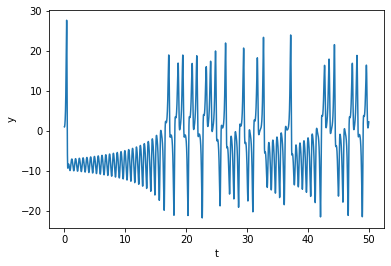

In [24]:
# plot results
plt.plot(tpoints,ypoints)
plt.ylabel("y")
plt.xlabel("t")
plt.show()

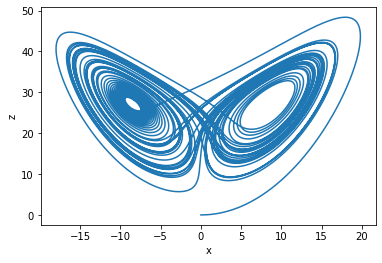

In [19]:
plt.plot(xpoints,zpoints)
plt.ylabel("z")
plt.xlabel("x")
plt.show()

Now the same with a Python library. Note that the trajectory changes a lot depending on the accuracy (try varying the ```rtol``` parameter). Different solution methods might yield better results.

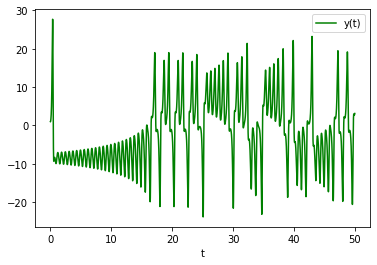

In [38]:
from scipy.integrate import solve_ivp

# remember that the order of arguments is different for solve_ivp
def f_mod(t, r):
    return f(r, t)

initial = [0.0,1,0.0]
sol = solve_ivp(f_mod, (start, end), initial, method='RK45', 
                t_eval = tpoints, rtol=1e-12)

# plot result
plt.plot(sol.t, sol.y[1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

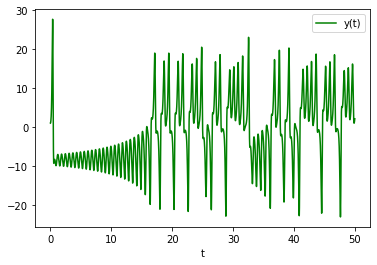

In [37]:
initial = [0.0,1,0.0]
sol = solve_ivp(f_mod, (start, end), initial, method='DOP853', 
                t_eval = tpoints, rtol=1e-12)

# plot result
plt.plot(sol.t, sol.y[1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()